#### Student Depression Variable Imputation

**Name:** Jazmin Morales.

### Import Libraries ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


#### Read Dataset 


In [19]:
df = pd.read_csv('Synthetic_Data_Cleaning_example.csv')
df.head

<bound method NDFrame.head of             Age         Income  Gender  Registered      City
0     34.967142   28769.438869    Male         1.0  New York
1     28.617357   43690.320159  Female         0.0     Paris
2     36.476885   44859.282252    MALE         1.0     Tokyo
3     45.230299   37965.840962  FEMALE         0.0    Berlin
4     27.658466   47580.714325    male         1.0  New York
..          ...            ...     ...         ...       ...
99    27.654129   32855.445533     NaN         0.0    Berlin
100  120.000000  200000.000000    Male         NaN  New York
101   -5.000000   -1000.000000  Female         1.0       NaN
102         NaN            NaN    MALE         0.0    Berlin
103   34.967142   28769.438869    Male         1.0  New York

[104 rows x 5 columns]>

#### Exploratory Data Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         103 non-null    float64
 1   Income      103 non-null    float64
 2   Gender      84 non-null     object 
 3   Registered  103 non-null    float64
 4   City        103 non-null    object 
dtypes: float64(3), object(2)
memory usage: 4.2+ KB


In [21]:
df.head()

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


In [6]:
##df = df.drop(['id'], axis=1)
##df.head()

In [22]:
df.shape

(104, 5)

In [23]:
df['City'].value_counts()

City
New York    27
Berlin      26
Paris       25
Tokyo       25
Name: count, dtype: int64

In [ ]:
#df['City'].value_counts()[df['City'].value_counts() < 400].sum()

np.int64(103)

### remove cities with less than 400 students ###

In [ ]:
#common_cities = df['City'].value_counts()[df['City'].value_counts() >= 400].index
#df = df[df['City'].isin(common_cities)]

In [24]:
df['City'].value_counts()

City
New York    27
Berlin      26
Paris       25
Tokyo       25
Name: count, dtype: int64

In [25]:
df.head()

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


<Axes: >

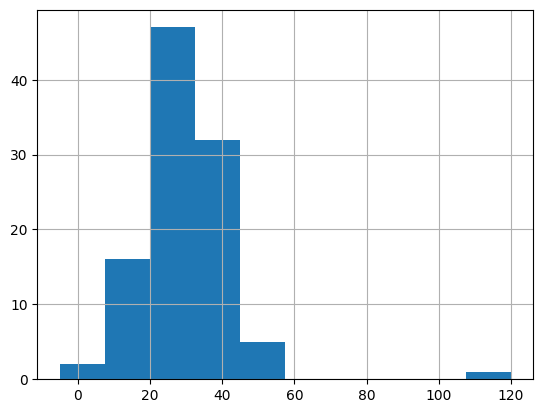

In [26]:

df['Age'].hist()

<Axes: >

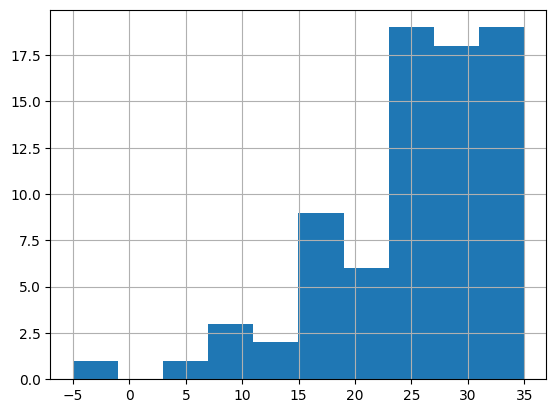

In [27]:
df['Age'] = df['Age'][df['Age'] <= 35]
df['Age'].hist()

#### Gender

In [28]:
# Normalizar valores de 'Gender': pasar a minúsculas y quitar espacios
df['Gender'] = df['Gender'].str.lower().str.strip()

# Mapear a valores estándar
gender_map = {
    'male': 'Male',
    'm': 'Male',
    'female': 'Female',
    'f': 'Female'
}
df['Gender'] = df['Gender'].map(gender_map)

# Ver resultado
print(df['Gender'].value_counts(dropna=False))


Gender
NaN       40
Male      33
Female    31
Name: count, dtype: int64


####  Verificar y tratar valores nulos en Registered

In [29]:
# Mostrar cuántos valores nulos hay
print("Valores nulos en 'Registered':", df['Registered'].isnull().sum())

# Rellenar valores nulos con el valor más frecuente (modo)
mode_registered = df['Registered'].mode()[0]
df['Registered'] = df['Registered'].fillna(mode_registered)

# Confirmar
print(df['Registered'].value_counts())


Valores nulos en 'Registered': 1
Registered
1.0    53
0.0    51
Name: count, dtype: int64


#### Verificar que Age e Income sean razonables

In [30]:
# Ver estadísticos generales
print(df[['Age', 'Income']].describe())

# Eliminar filas con valores negativos o fuera de rango lógico
df = df[(df['Age'] > 0) & (df['Age'] < 100)]
df = df[(df['Income'] > 0) & (df['Income'] < 500000)]  # Puedes ajustar este límite si es necesario


             Age         Income
count  78.000000     103.000000
mean   25.012113   51079.867179
std     7.671088   21167.304578
min    -5.000000   -1000.000000
25%    21.684635   37726.305475
50%    26.436278   51028.444622
75%    30.905823   58315.989946
max    34.967142  200000.000000


####  Eliminar duplicados

In [31]:
# Verificar duplicados
print("Duplicados encontrados:", df.duplicated().sum())

# Eliminar duplicados
df = df.drop_duplicates()

# Confirmar
print("Duplicados después de limpiar:", df.duplicated().sum())


Duplicados encontrados: 1
Duplicados después de limpiar: 0


In [32]:
df.head()

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
4,27.658466,47580.714325,Male,1.0,New York
5,27.658630,56060.762852,Female,0.0,Paris
8,25.305256,53863.255861,NaN,1.0,New York


#### Data Transformation 